In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4,5
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [4]:
df.columns = ['col1', 'col2','col3','col4','col5','target']

In [5]:
df.head()

,col1,col2,col3,col4,col5,target
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [6]:
df.describe()

,col1,col2,col3,col4,col5,target
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   col1    151 non-null    int64
 1   col2    151 non-null    int64
 2   col3    151 non-null    int64
 3   col4    151 non-null    int64
 4   col5    151 non-null    int64
 5   target  151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


*No missing values, no Data-cleaning required.*

In [8]:
df.corr()

,col1,col2,col3,col4,col5,target
col1,1.000000,-0.250510,0.134660,0.214417,-0.151547,-0.255466
col2,-0.250510,1.000000,-0.236010,-0.168573,-0.035765,0.075095
col3,0.134660,-0.236010,1.000000,0.224927,-0.033485,0.143103
col4,0.214417,-0.168573,0.224927,1.000000,0.269554,-0.282742
col5,-0.151547,-0.035765,-0.033485,0.269554,1.000000,-0.035676
target,-0.255466,0.075095,0.143103,-0.282742,-0.035676,1.000000


In [9]:
df.corr()[5:6].transpose().sort_values('target')

,target
col4,-0.282742
col1,-0.255466
col5,-0.035676
col2,0.075095
col3,0.143103
target,1.000000


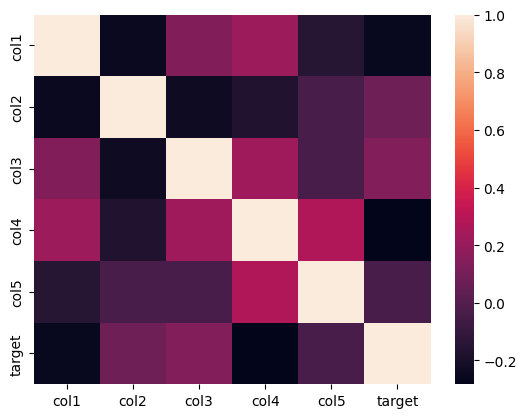

In [10]:
sns.heatmap(df.corr());

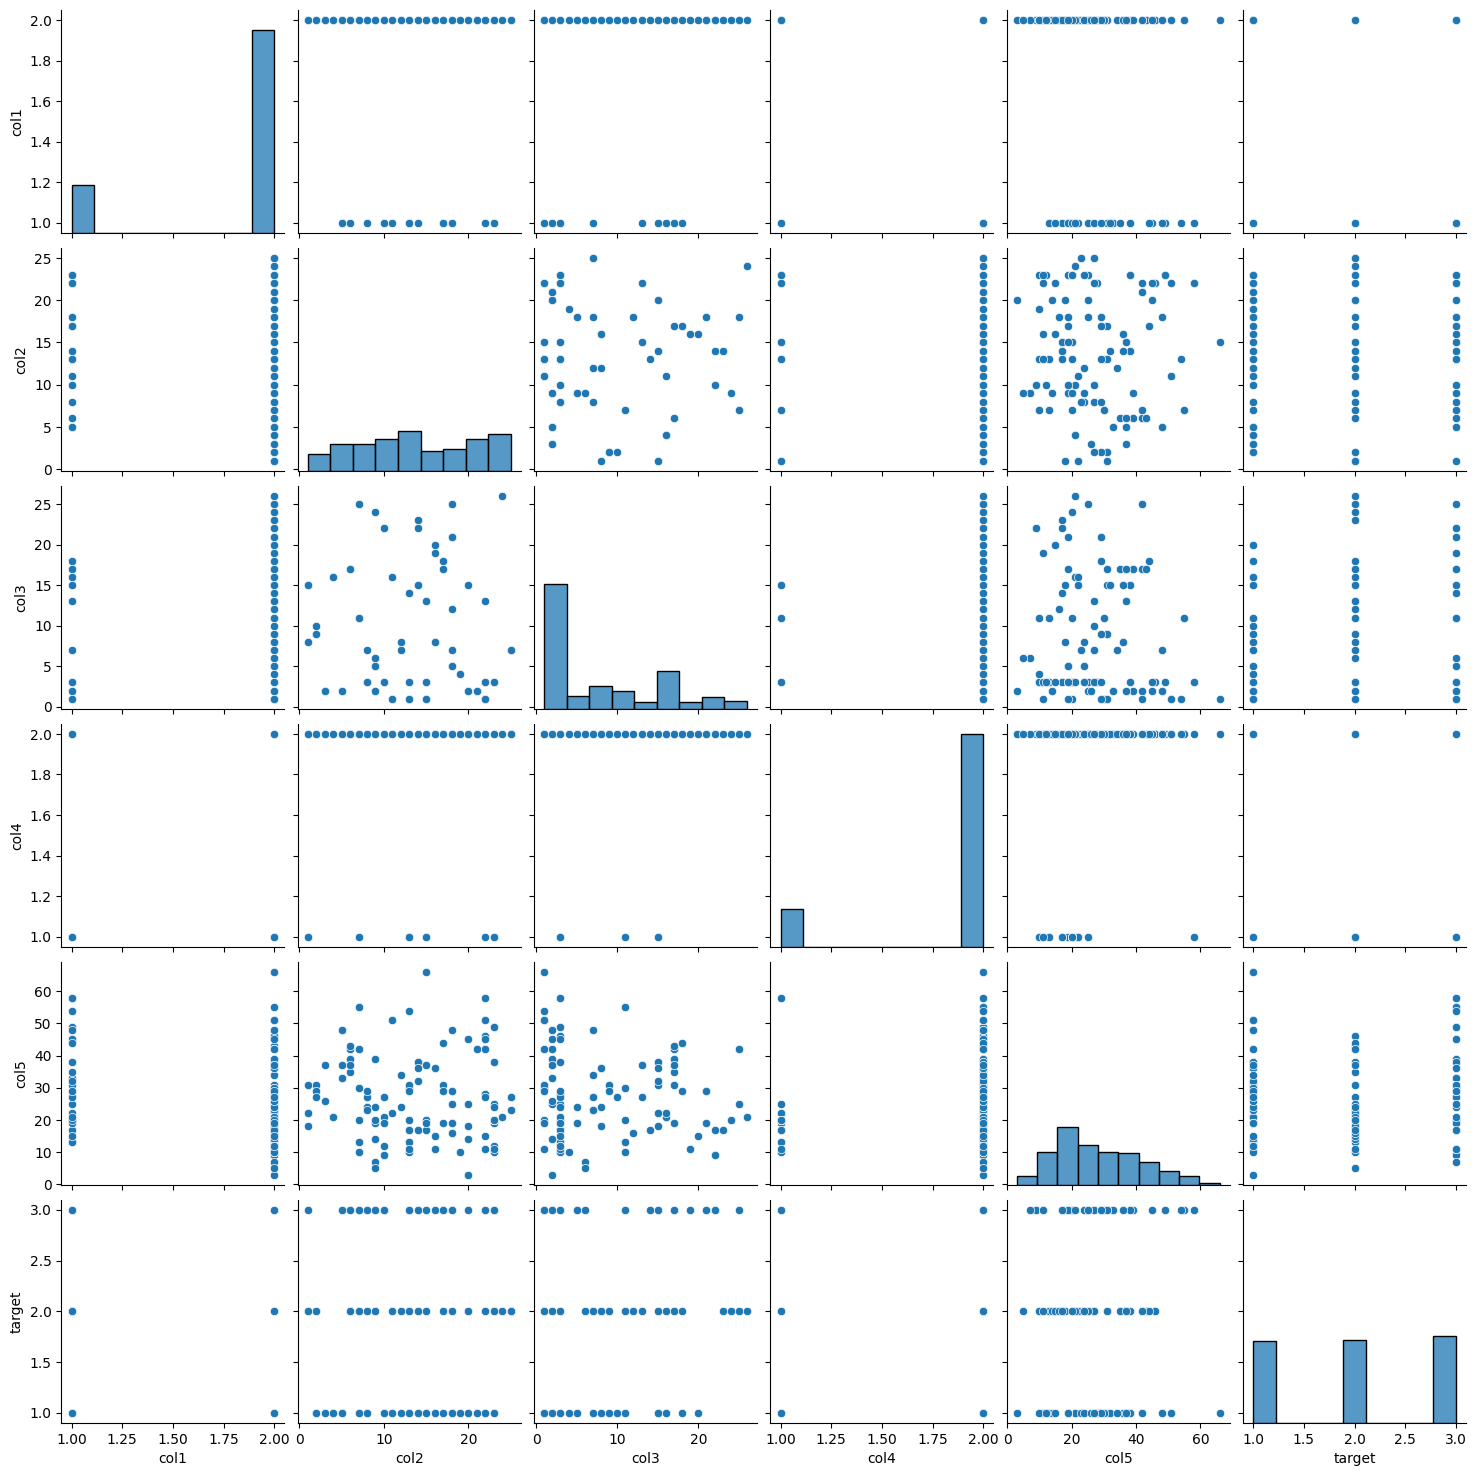

In [11]:
sns.pairplot(df)

# Split dataset into training and testing

In [12]:
df.columns

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')

In [13]:
X= df[['col1', 'col2', 'col3', 'col4', 'col5']]
y = df['target']

In [14]:
type(X)

pandas.core.frame.DataFrame

In [15]:
type(y)

pandas.core.series.Series

In [16]:
y

0      3
1      3
2      3
3      3
4      3
      ..
146    1
147    1
148    1
149    1
150    1
Name: target, Length: 151, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

# Logistic Regression - Classification Algorithm

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)

c:\Users\sachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
predictions

array([1, 1, 2, 2, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 2, 1, 3, 3, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2], dtype=int64)

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print('   TN    FP')
print('   FN    TP')
print('Accuracy Score :',accuracy_score(y_test,predictions))


              precision    recall  f1-score   support

           1       0.57      0.71      0.63        17
           2       0.30      0.33      0.32         9
           3       0.57      0.33      0.42        12

    accuracy                           0.50        38
   macro avg       0.48      0.46      0.46        38
weighted avg       0.51      0.50      0.49        38

[[12  4  1]
 [ 4  3  2]
 [ 5  3  4]]
   TN    FP
   FN    TP
Accuracy Score : 0.5


# Random Forest Algorithm

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

In [23]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print('   TN    FP')
print('   FN    TP')
print('Accuracy Score :',accuracy_score(y_test,predictions))


              precision    recall  f1-score   support

           1       0.80      0.71      0.75        17
           2       0.55      0.67      0.60         9
           3       0.83      0.83      0.83        12

    accuracy                           0.74        38
   macro avg       0.73      0.74      0.73        38
weighted avg       0.75      0.74      0.74        38

[[12  4  1]
 [ 2  6  1]
 [ 1  1 10]]
   TN    FP
   FN    TP
Accuracy Score : 0.7368421052631579


# SVM Algorithm

In [24]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)

In [25]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print('   TN    FP')
print('   FN    TP')
print('Accuracy Score :',accuracy_score(y_test,predictions))


              precision    recall  f1-score   support

           1       0.50      0.06      0.11        17
           2       0.28      0.56      0.37         9
           3       0.33      0.50      0.40        12

    accuracy                           0.32        38
   macro avg       0.37      0.37      0.29        38
weighted avg       0.39      0.32      0.26        38

[[1 8 8]
 [0 5 4]
 [1 5 6]]
   TN    FP
   FN    TP
Accuracy Score : 0.3157894736842105


In [ ]:
# Decision Tree Algorithm

In [43]:

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 1.0
